In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
Spotify_df=pd.read_csv('/Users/ranaarafat/Documents/Data Analyst course/Final project/spotify_songs.csv') #change it 
Spotify_df

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,7zXzWCVuz7whIuYZyEAlxt,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,1l4aoukbPgi5u2OaE2R4Zj,Rising Like The Sun,2014-03-24,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,...,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en
18450,7zycSpvjDcqh6YT1FEl2kY,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,5qs8T6ZHSrnllnOuUk6muC,The Pinkprint (Deluxe Edition),2014-12-15,10er Playlist,1kEczIkZH8IgaWT2BiApxZ,...,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en
18451,7zye9v6B785eFWEFYs13C2,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,1xdgLmTFMSyJyI5DJOOX7T,2+2+1 = (Digitally Remastered),2013-07-09,Sexy Soul 2020,5EMARioe9z9eKOeWIAC2JW,...,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en
18452,7zyLObYw4QUKQDyZOb4J0Y,I'll Do 4 U (Re-Recorded / Remastered),Father MC,(Would you do for me) Sweetheart (Would you do...,36,14HYMxFhpgDIr9cci1u0kt,I'll Do 4 U (Re-Recorded / Remastered),2010-10-01,New Jack Swing/ R&B Hits: 1987 - 2002,4sji14lrB5bgcr51lPALYH,...,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,en


In [3]:
Spotify_df.shape

(18454, 25)

In [4]:
Spotify_df.isna().sum()

track_id                      0
track_name                    0
track_artist                  0
lyrics                      260
track_popularity              0
track_album_id                0
track_album_name              0
track_album_release_date      0
playlist_name                 0
playlist_id                   0
playlist_genre                0
playlist_subgenre             0
danceability                  0
energy                        0
key                           0
loudness                      0
mode                          0
speechiness                   0
acousticness                  0
instrumentalness              0
liveness                      0
valence                       0
tempo                         0
duration_ms                   0
language                    260
dtype: int64

In [5]:
Spotify_df=Spotify_df.drop(columns=['lyrics','track_album_id','playlist_name','playlist_id'])
Spotify_df

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,41,Trip,2001-01-01,rock,classic rock,0.682,0.401,...,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,28,Love & Loss,2017-11-21,rock,hard rock,0.303,0.880,...,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,0,Gold,2005-01-01,r&b,new jack swing,0.845,0.652,...,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,41,CeeLo's Magic Moment,2012-10-29,r&b,neo soul,0.425,0.378,...,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,pop,dance pop,0.760,0.887,...,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,7zXzWCVuz7whIuYZyEAlxt,Rising Like The Sun - Radio Mix,Qulinez,0,Rising Like The Sun,2014-03-24,edm,progressive electro house,0.479,0.800,...,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en
18450,7zycSpvjDcqh6YT1FEl2kY,Anaconda,Nicki Minaj,49,The Pinkprint (Deluxe Edition),2014-12-15,pop,electropop,0.963,0.603,...,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en
18451,7zye9v6B785eFWEFYs13C2,Bound,Ponderosa Twins Plus One,40,2+2+1 = (Digitally Remastered),2013-07-09,r&b,neo soul,0.458,0.540,...,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en
18452,7zyLObYw4QUKQDyZOb4J0Y,I'll Do 4 U (Re-Recorded / Remastered),Father MC,36,I'll Do 4 U (Re-Recorded / Remastered),2010-10-01,r&b,new jack swing,0.832,0.666,...,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,en


In [6]:
Spotify_df.isna().sum()

track_id                      0
track_name                    0
track_artist                  0
track_popularity              0
track_album_name              0
track_album_release_date      0
playlist_genre                0
playlist_subgenre             0
danceability                  0
energy                        0
key                           0
loudness                      0
mode                          0
speechiness                   0
acousticness                  0
instrumentalness              0
liveness                      0
valence                       0
tempo                         0
duration_ms                   0
language                    260
dtype: int64

In [7]:
Spotify_df['language'].fillna('Others', inplace=True)
Spotify_df

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,41,Trip,2001-01-01,rock,classic rock,0.682,0.401,...,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,28,Love & Loss,2017-11-21,rock,hard rock,0.303,0.880,...,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,0,Gold,2005-01-01,r&b,new jack swing,0.845,0.652,...,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,41,CeeLo's Magic Moment,2012-10-29,r&b,neo soul,0.425,0.378,...,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,pop,dance pop,0.760,0.887,...,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,7zXzWCVuz7whIuYZyEAlxt,Rising Like The Sun - Radio Mix,Qulinez,0,Rising Like The Sun,2014-03-24,edm,progressive electro house,0.479,0.800,...,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656,en
18450,7zycSpvjDcqh6YT1FEl2kY,Anaconda,Nicki Minaj,49,The Pinkprint (Deluxe Edition),2014-12-15,pop,electropop,0.963,0.603,...,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240,en
18451,7zye9v6B785eFWEFYs13C2,Bound,Ponderosa Twins Plus One,40,2+2+1 = (Digitally Remastered),2013-07-09,r&b,neo soul,0.458,0.540,...,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205,en
18452,7zyLObYw4QUKQDyZOb4J0Y,I'll Do 4 U (Re-Recorded / Remastered),Father MC,36,I'll Do 4 U (Re-Recorded / Remastered),2010-10-01,r&b,new jack swing,0.832,0.666,...,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890,en


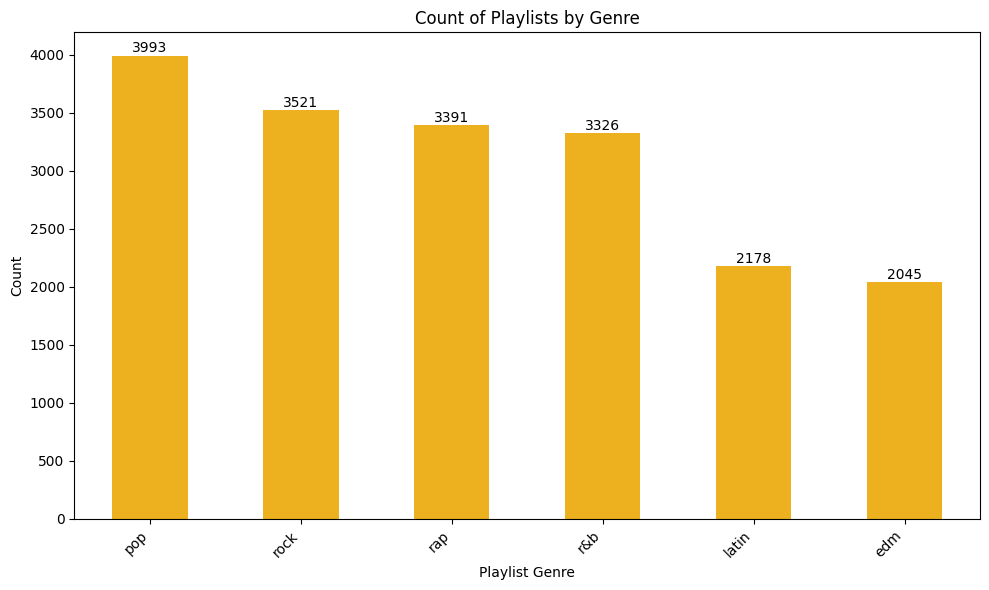

In [8]:
#Count of Playlists by Genre

playlist_genre_counts = Spotify_df['playlist_genre'].value_counts()

# Plotting
plt.figure(figsize=(10, 6)) 
playlist_genre_counts.plot(kind='bar', color='#EDB120')

for i, count in enumerate(playlist_genre_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Count of Playlists by Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



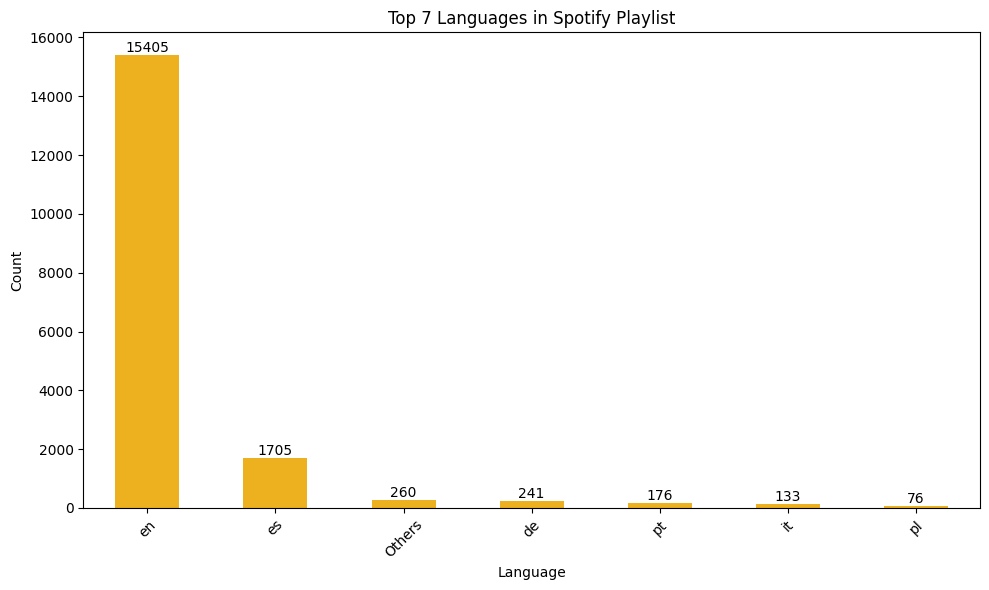

In [9]:
#Top 7 Languages in Spotify Playlist

language_counts = Spotify_df['language'].value_counts().head(7)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
language_counts.plot(kind='bar', color='#EDB120')

# Add labels for each bar
for i, count in enumerate(language_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Top 7 Languages in Spotify Playlist')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

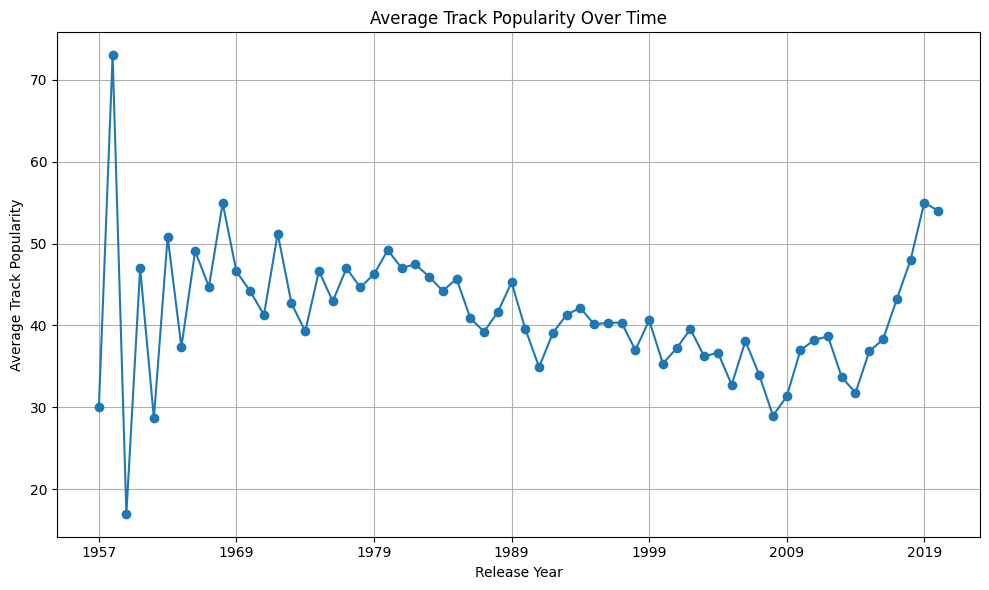

In [19]:
# Extract the release year from the 'track_album_release_date' column
Spotify_df['release_year'] = Spotify_df['track_album_release_date'].str[:4]

# Group by release year and calculate the average popularity for each year
average_popularity_by_year = Spotify_df.groupby('release_year')['track_popularity'].mean()

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
average_popularity_by_year.plot(marker='o', linestyle='-')
plt.title('Average Track Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Track Popularity')
plt.grid(True)  
plt.tight_layout()
plt.show()

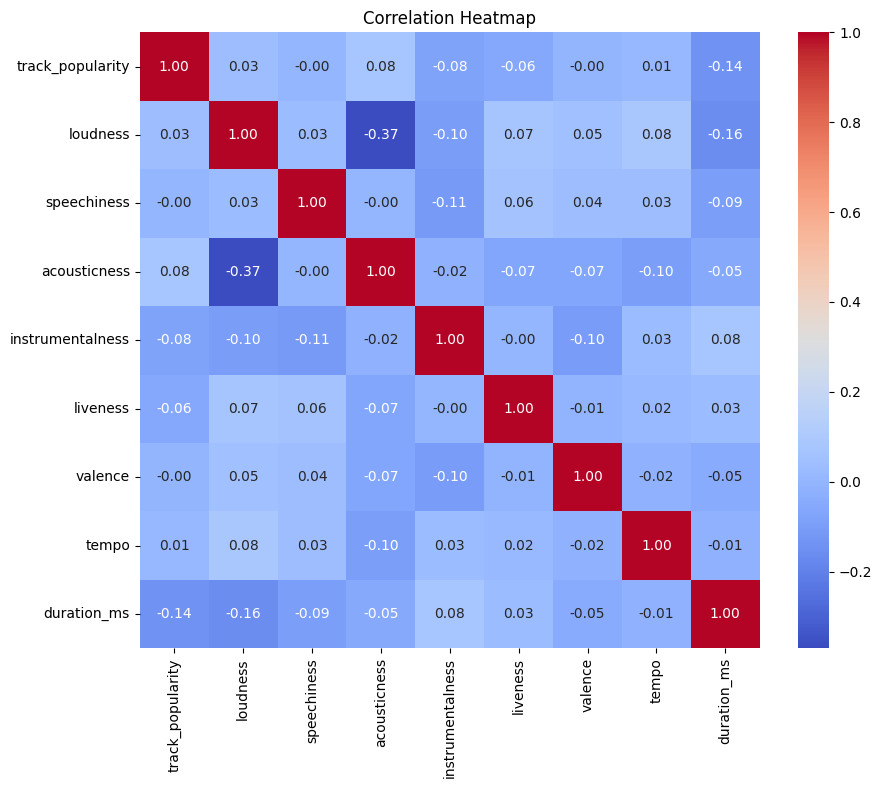

In [11]:
selected_columns = ['track_popularity', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
correlation_df = Spotify_df[selected_columns]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
popularity_by_artist = Spotify_df.groupby('track_artist')['track_popularity'].sum()

# Find the artist with the highest popularity
highest_popularity_artist = popularity_by_artist.idxmax()  # Get the index of the maximum value

# Get the highest popularity value
highest_popularity_value = popularity_by_artist.max()

print(f"The artist with the highest track popularity is: {highest_popularity_artist}")
print(f"Their track popularity is: {highest_popularity_value:.2f}")

The artist with the highest track popularity is: Queen
Their track popularity is: 5322.00


In [13]:
Spotify_df['track_artist'].value_counts()

track_artist
Queen                       125
David Guetta                 74
Don Omar                     74
Martin Garrix                71
Drake                        65
                           ... 
Yeah Yeah Yeahs               1
Black Pistol Fire             1
Jack Vallier                  1
Jeremy Jordan                 1
Ponderosa Twins Plus One      1
Name: count, Length: 6031, dtype: int64

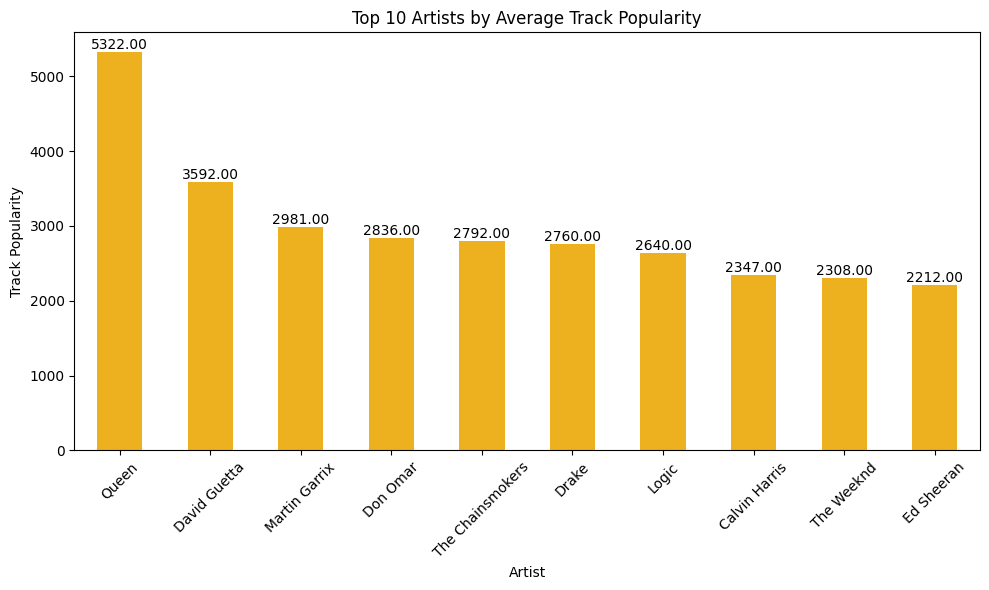

In [14]:
# Group by artist and calculate the average popularity for each artist
average_popularity_by_artist = Spotify_df.groupby('track_artist')['track_popularity'].sum()

# Select the top 10 artists with the highest average popularity
top_7_artists = average_popularity_by_artist.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
top_7_artists.plot(kind='bar', color='#EDB120')

for i, popularity in enumerate(top_7_artists):
    plt.text(i, popularity + 0.5, f'{popularity:.2f}', ha='center', va='bottom')


plt.title('Top 10 Artists by Average Track Popularity')
plt.xlabel('Artist')
plt.ylabel('Track Popularity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

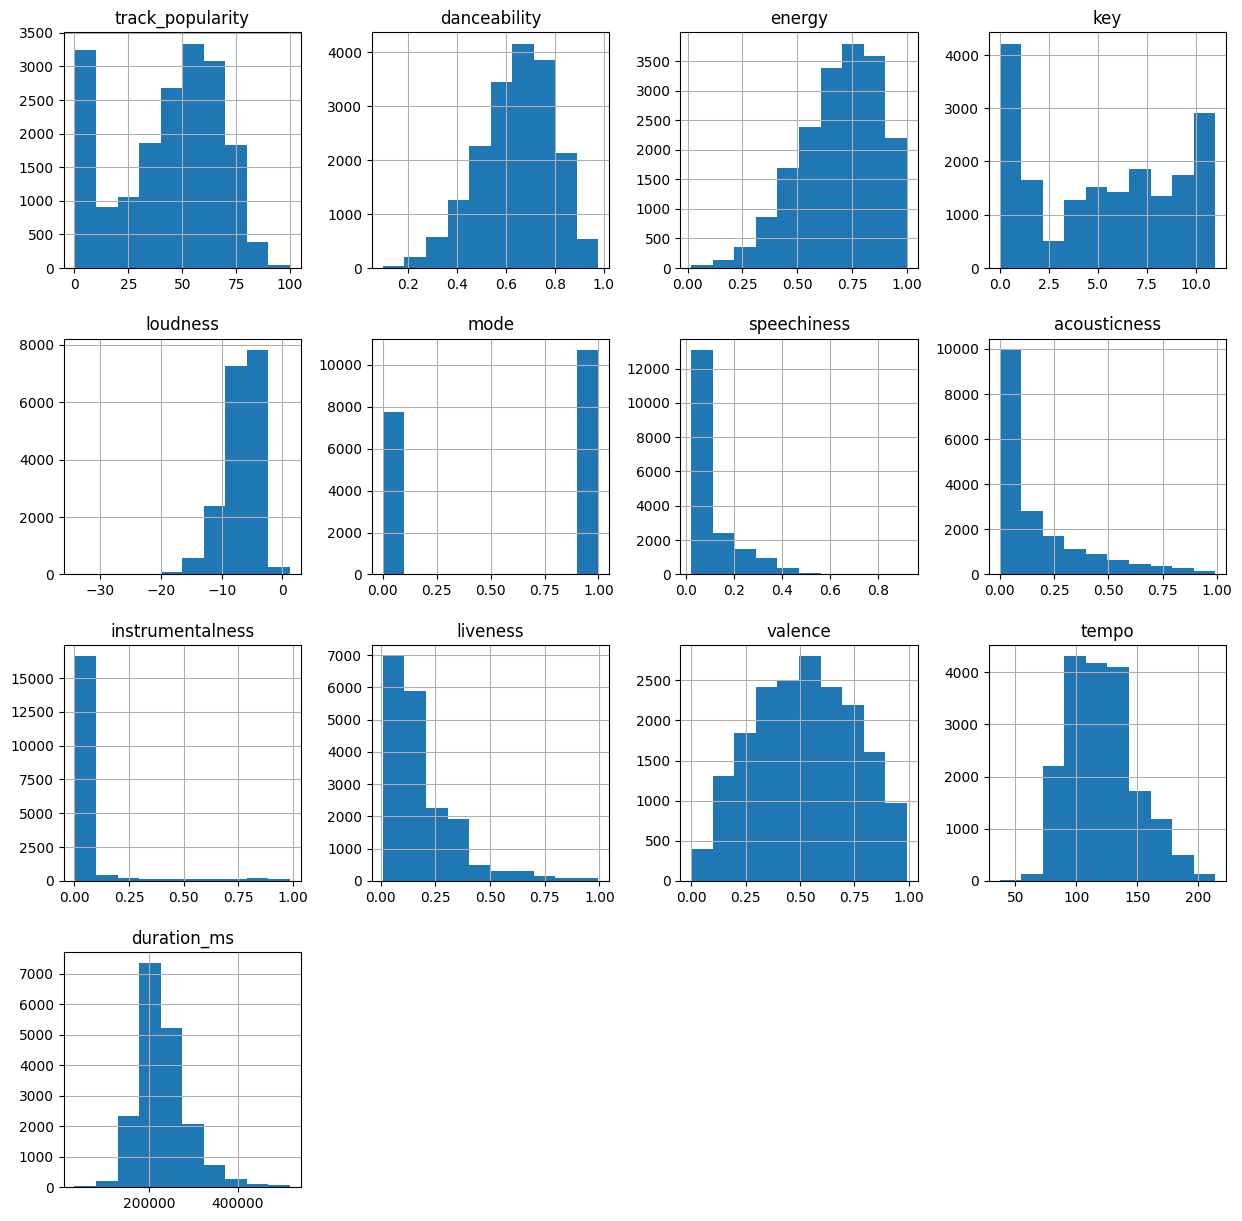

In [15]:
Spotify_df.hist(figsize = (15,15))
plt.show()

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_name', 'track_album_release_date', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'language', 'release_year'],
      dtype='object')


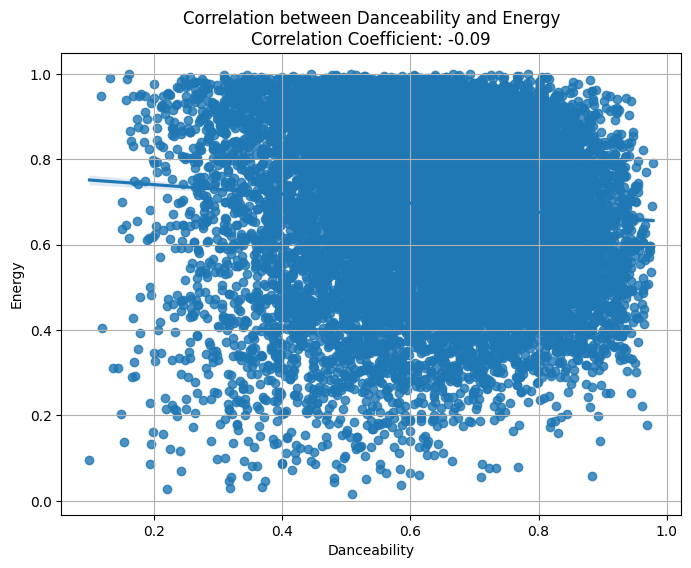

In [21]:
# Check the columns in the DataFrame
print(Spotify_df.columns)

# Assuming 'danceability' and 'energy' are the column names you want to use
danceability_column = 'danceability'
energy_column = 'energy'

# Calculate correlation between danceability and energy
correlation = Spotify_df[[danceability_column, energy_column]].corr().iloc[0, 1]

# Create a scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=danceability_column, y=energy_column, data=Spotify_df)
plt.title(f'Correlation between Danceability and Energy\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

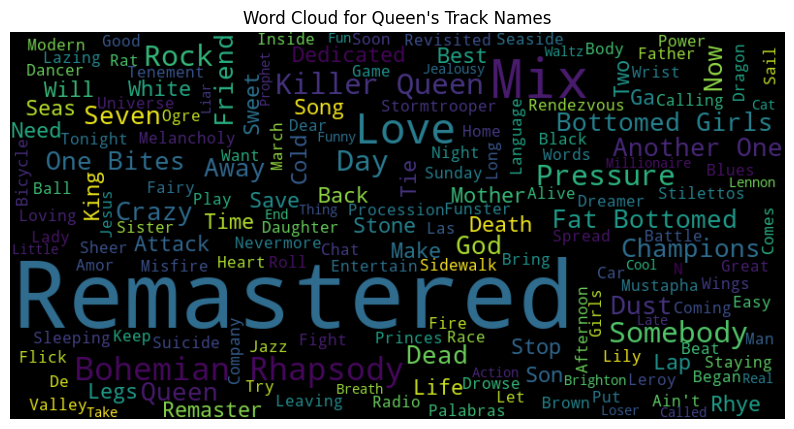

In [17]:
from wordcloud import WordCloud

queen_tracks = Spotify_df[Spotify_df['track_artist'] == 'Queen']
queen_tracks_sorted = queen_tracks.sort_values(by='track_popularity', ascending=False)
top_song_name = queen_tracks_sorted.iloc[0]['track_name']
all_track_names = ' '.join(queen_tracks['track_name'])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400).generate(all_track_names)
wordcloud.words_[top_song_name] = 100
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Queen\'s Track Names')
plt.axis('off')
plt.show()